In [75]:
# %pip install --quiet pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the dataset
df = pd.read_csv('climate_action_data.csv')

# inspect the dataset
print(df.head())
print(df.info())

  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                        8.3   
2  Tomatoes                          36.0                       29.4   
3     Maize                          85.8                       19.6   
4     Wheat                          75.6                       29.9   

  Drone_Image_ID  
0       IMG-2000  
1       IMG-2001  
2       IMG-2002  
3       IMG-2003

In [ ]:
print(df.describe())
print(df.shape)
print(df.dtypes)

       Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C)  \
count        913         909              913     913            913   
unique       800         798              750     313            170   
top     SEN-1430  2026-09-10            error    7.54           19.1   
freq           2           2                5      11             13   

       Humidity(%) Crop_Type Fertilizer_Recommended(kg/ha)  \
count          913       909                           913   
unique         448         5                           595   
top           56.0     Wheat                          66.9   
freq             8       203                             8   

       Irrigation_Recommended(mm) Drone_Image_ID  
count                         913            913  
unique                        243            800  
top                           8.0       IMG-2430  
freq                           11              2  
(913, 10)
Sensor_ID                        object
Date                   

In [78]:
# identify empty cells
df.isna().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [79]:
numeric_cols = ['Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)','Soil_Moisture(%)']
# convert columns to numeric, coercing errors to NaN
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
# identify empty cells
print(df.isna().sum())


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64


In [80]:
# replace erroneous values with mode
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    
# check if there are still empty cells
print(df.isna().sum())

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [81]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print(df['Date'].isna().sum())
# Print the most frequent date in the 'Date' column
print("Most frequent date:", df['Date'].mode()[0])
# frequency of most frequent date
print("Frequency of most frequent date:", df['Date'].value_counts().iloc[0])

4
Most frequent date: 2025-01-04 00:00:00
Frequency of most frequent date: 2


In [82]:
# show duplicate count
print("Duplicate rows count:", df.duplicated().sum())


Duplicate rows count: 111


In [83]:
# remove duplicates

df.drop_duplicates(inplace=True)
# show duplicate count after removing duplicates
print("Duplicate rows count after removing duplicates:", df.duplicated().sum())

# show duplicates in date field
print("date mode", df['Date'].mode()[0])
print("Date modal frequency: ",df['Date'].value_counts().max())


Duplicate rows count after removing duplicates: 0
date mode 2025-01-01 00:00:00
Date modal frequency:  1


In [84]:
# since the rest of the data has no duplicate dates. I will drop the null dates
df.dropna(subset=['Date'], inplace=True)
print(df.shape)
# check for duplicates again
print("Duplicate rows count after removing null dates:", df['Date'].isna().sum())


(798, 10)
Duplicate rows count after removing null dates: 0


In [85]:
print("frequency of crop types",df['Crop_Type'].value_counts())
print("Missing crop types:", df['Crop_Type'].isna().sum())




frequency of crop types Crop_Type
Wheat       172
Tomatoes    166
Maize       155
Beans       151
Lettuce     150
Name: count, dtype: int64
Missing crop types: 4


In [86]:
df.dropna(subset=['Crop_Type'], inplace=True)
print(df['Crop_Type'].value_counts())
# check for empty cells again
print(df.isna().sum())   
print(df.shape)

Crop_Type
Wheat       172
Tomatoes    166
Maize       155
Beans       151
Lettuce     150
Name: count, dtype: int64
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64
(794, 10)


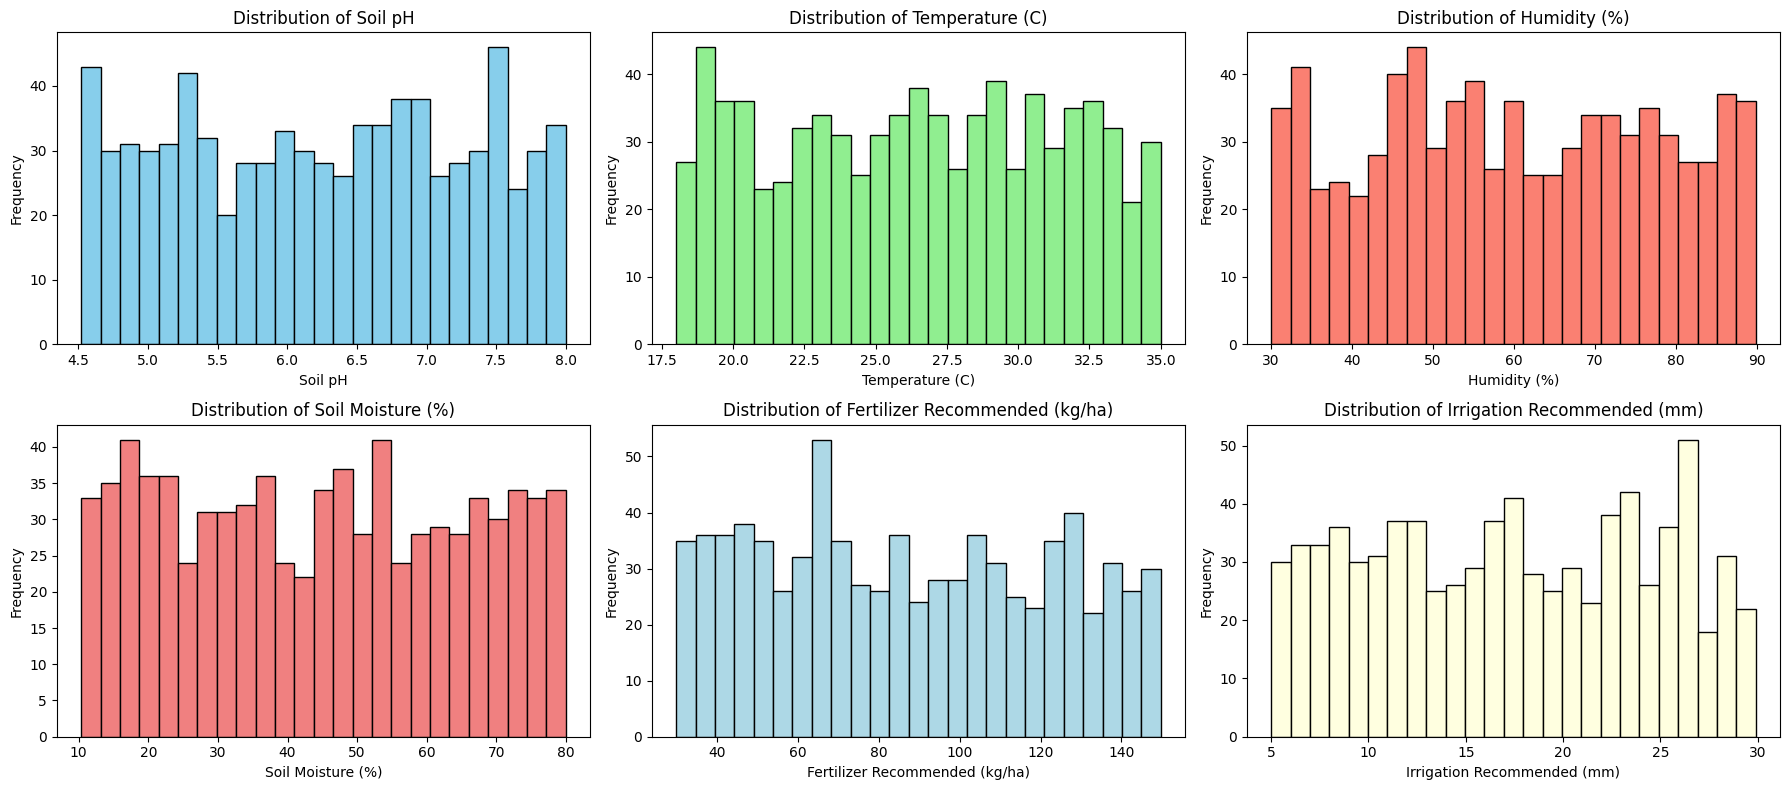

In [87]:
plt.figure(figsize=(18, 8))

plt.subplot(2, 3, 1)
plt.title('Distribution of Soil pH')
plt.xlabel('Soil pH')
plt.ylabel('Frequency')
plt.hist(df['Soil_pH'], bins=25, color='skyblue', edgecolor='black')

plt.subplot(2, 3, 2)
plt.title('Distribution of Temperature (C)')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.hist(df['Temperature(C)'], bins=25, color='lightgreen', edgecolor='black')

plt.subplot(2, 3, 3)
plt.title('Distribution of Humidity (%)')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.hist(df['Humidity(%)'], bins=25, color='salmon', edgecolor='black')

plt.subplot(2, 3, 4)
plt.title('Distribution of Soil Moisture (%)')
plt.xlabel('Soil Moisture (%)')
plt.ylabel('Frequency')
plt.hist(df['Soil_Moisture(%)'], bins=25, color='lightcoral', edgecolor='black') 

plt.subplot(2, 3, 5)
plt.title('Distribution of Fertilizer Recommended (kg/ha)')
plt.xlabel('Fertilizer Recommended (kg/ha)')
plt.ylabel('Frequency')
plt.hist(df['Fertilizer_Recommended(kg/ha)'], bins=25, color='lightblue', edgecolor='black')

plt.subplot(2, 3, 6)
plt.title('Distribution of Irrigation Recommended (mm)')
plt.xlabel('Irrigation Recommended (mm)')
plt.ylabel('Frequency')
plt.hist(df['Irrigation_Recommended(mm)'], bins=25, color='lightyellow', edgecolor='black')

plt.tight_layout()
plt.show()




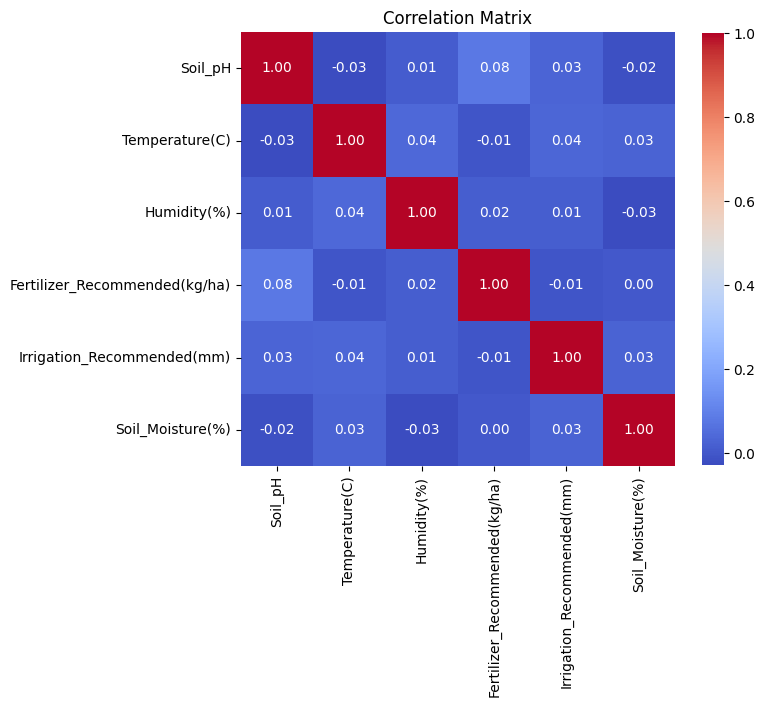

In [88]:
# correlation matrix
plt.figure(figsize=(7, 7))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()


/var/folders/t4/fp87jt9n1438scx07zt_2q_80000gp/T/ipykernel_71464/263852246.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_soil_moisture.index, y=avg_soil_moisture.values, palette='viridis')


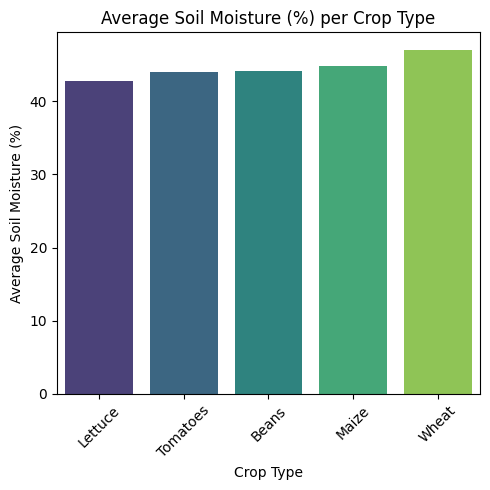

crop type with maximum average soil moisture: Wheat


In [89]:
# average soil moisture per crop type
avg_soil_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values()
plt.figure(figsize=(5, 5))
sns.barplot(x=avg_soil_moisture.index, y=avg_soil_moisture.values, palette='viridis')
plt.title('Average Soil Moisture (%) per Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Average Soil Moisture (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

max_average_soil_moisture = avg_soil_moisture.max()
print("crop type with maximum average soil moisture:", avg_soil_moisture.idxmax())

In [90]:
average_temperatures = df.groupby('Crop_Type')['Temperature(C)'].mean()
print(average_temperatures)



Crop_Type
Beans       26.849007
Lettuce     26.105333
Maize       26.961935
Tomatoes    26.168072
Wheat       26.088953
Name: Temperature(C), dtype: float64


### Advice for crops experirncing over 30 degrees average temperature

there are no crops experiencing more than 30 degrees average temperature